### Здесь я попытаюсь исследовать средние баллы студентов различных факультетов, полученные ими после выполнения домашнего задания к лекции №1 на платформе "Яндекс.Контест" в рамках МФК "Введение в программирование и анализ данных на Python". Файл с сырыми данными был любезно предоставлен руководством МФК.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Преобразуем файл в таблицу
df = pd.read_csv('result_lec01.csv')

# Взглянем
df.head()

,Unnamed: 0,place,1(Быстрая черепашка),2(Вопрос о фигуре),3(Послание ),4(Построй дом!),5(Звездочный квадрат),Score,Penalty,department,hash
0,0,1,+,+,+,+,+,5,21,Не из МГУ,b6a720e40da936c330e1f53680b279381d1c5742
1,1,2,+,+,+,+,+,5,31,Физический факультет,57bd006a9261c889d76cba7537a3b61671cbcc6a
2,2,3,+,+,+,+,+,5,35,Механико-математический факультет,0b7a6e627adeb9d50c5ecb7b5a17ea452ec87659
3,3,4,+,+,+,+,+,5,55,Факультет вычислительной математики и кибернетики,c22dc82f7e88a8973a18180d85d5a3b0cf641b75
4,4,5,+,+,+,+,+,5,64,Механико-математический факультет,1ac42c1757e5790d220299fbe51540beda8b1d8a


In [9]:
# Удалим лишние для анализа столбцы (первые 7 срезом, 2 отдельно)
df.drop([*df.columns[0:7], 'Penalty', 'hash'], axis=1, inplace=True)

# Удалим строки участников, не указавших факультет
df.dropna(inplace=True)

# Переименуем столбец "department" в "Department" для постоянства стиля имён столбцов
df.rename(columns={'department': 'Department'}, inplace=True)

# Взглянем
df.head()

,Score,Department
0,5,Не из МГУ
1,5,Физический факультет
2,5,Механико-математический факультет
3,5,Факультет вычислительной математики и кибернетики
4,5,Механико-математический факультет


In [10]:
# Найдём среднее арифметическое количество баллов для каждого факультета
scores = df.groupby('Department')['Score'].mean()

# Отсортируем факультеты по баллам
scores.sort_values(inplace=True)

# Взглянем
scores.sample(5).sort_values(ascending=False)

Department
Химический факультет                                     5.0
Факультет фундаментальной физико-химической инженерии    5.0
Факультет почвоведения                                   5.0
Филологический факультет                                 5.0
Факультет космических исследований                       5.0
Name: Score, dtype: float64

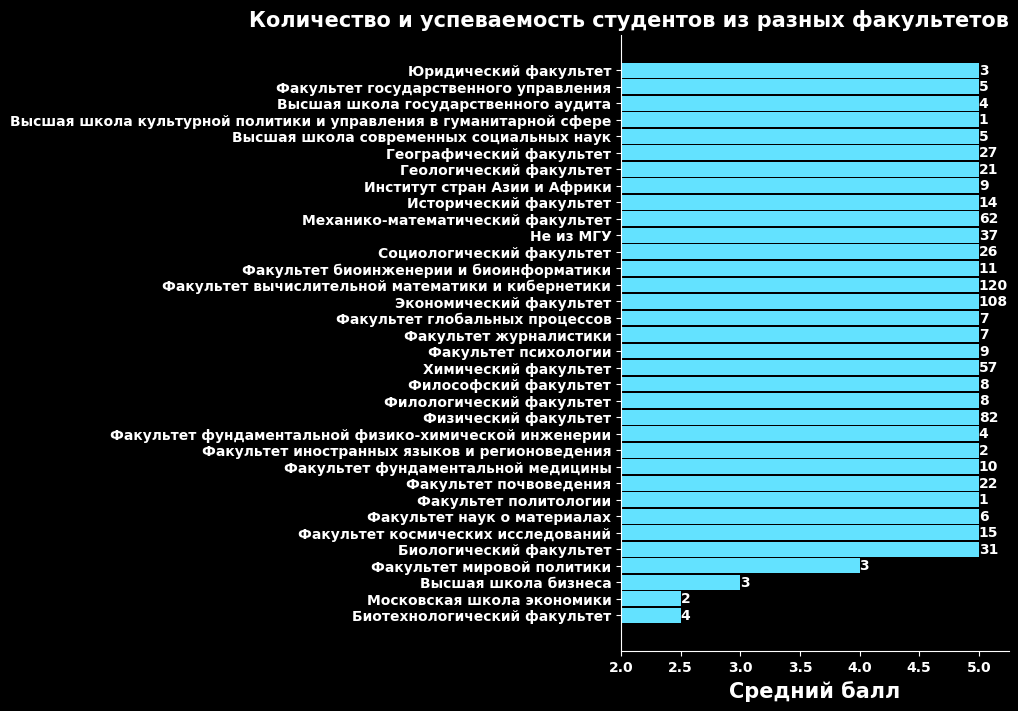

In [11]:
# Преобразуем Series в DataFrame, т.к. plt.bar() не умеет в Series
scores_df = pd.DataFrame({'Department': scores.index, 'Score': scores.values})

# Настроим размер диаграммы
fig, ax = plt.subplots(figsize=(5, 8))

# Уберём лишнюю часть рамки диаграммы
ax.spines[['right', 'top']].set_visible(False)

# Включим тёмную тему диаграммы
plt.style.use('dark_background')

# Построим горизонтальную столбчатую диаграмму
plt.barh(scores_df['Department'], scores_df['Score'],
         color='#63e2ff',
         height=0.9)
plt.title('Количество и успеваемость студентов из разных факультетов',
          loc='right',
          fontweight='bold',
          fontsize=15)
plt.xlabel('Средний балл', fontweight='bold', fontsize=15)
plt.xlim(xmin=2)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Присоединим к столбцам количество студентов из соответствующих факультетов
for x, y, quantity in zip(scores_df['Score'],
                          range(len(df.value_counts('Department'))),
                          df.value_counts('Department').loc[scores_df['Department']]):
    ax.text(x, y, str(quantity),
            ha='left',
            va='center',
            fontweight='bold')

# Раскомментируй строку ниже и запусти, чтобы сохранить себе изображение диграммы
# plt.savefig('plot1.jpeg', dpi=500, bbox_inches='tight', pad_inches=0.5)

# Взглянем
plt.show()

Построим диаграмму рассеяния для выявления зависимости между средним арифметическим баллом факультета и количеством студентов на факультете, чтобы стало более наглядно, насколько размер выборки влияет на средний арифметический балл.


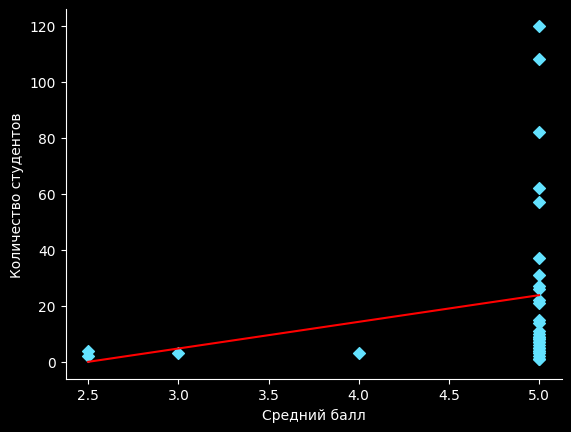

In [12]:
# Посчитаем количество студентов из каждого факультета и отсортируем в соответствии с индексами-метками DataFrame средних арифметических значений
student_counts = df.value_counts('Department').reindex(scores_df['Department'])

# Посчитаем коэффициент регрессии
regression = np.polyfit(scores_df['Score'], student_counts, 1)

# Уберём лишнюю часть рамки диаграммы
fig, ax = plt.subplots()
ax.spines[['right', 'top']].set_visible(False)

# Построим диаграмму рассеяния
plt.scatter(scores_df['Score'], student_counts,
            marker='D',
            color='#63e2ff')
plt.xlabel('Средний балл')
plt.ylabel('Количество студентов')

# Проведём линию регрессии
plt.plot(scores_df['Score'], np.polyval(
    regression, scores_df['Score']), color='r')

# Раскомментируй строку ниже и запусти, чтобы сохранить себе изображение диграммы
# plt.savefig('plot2.jpeg', dpi=500, bbox_inches='tight', pad_inches=0.5)

# Взглянем
plt.show()

По линии регрессии видно, что корреляция слабая. Из этого следует, что зависимость между средним арифметическим баллом факультета и количеством студентов на факультете отсутствует, и предыдущая диаграмма с высокой точностью отражает реальность.
